# Topics covered in this part of the course

DATA ANALYSIS WITH PYTHON III - Data Visualization & Descriptive Statistics
EDA with Python - Data Visualization

* Matplotlib vs Seaborn
* Foundational Charts: bar chat, scatter plot, line graph
* Plot Multiple Elements
* Data Visualization Customization

EDA with Python - Descriptive Statistics

* Descriptive Statistics using Pandas and NumPy
* Statistical Charts - Histogram and Boxplot
* Pairplots
* Correlations



# Part 2

Student will...

A) 
B) 
C) 
D) 



**Student output** : Well-documented code presented in a Jupyter notebookshowing results of EDA, including multiple well-labeled visualizations and identification of and handling of missing values (they should be handled with functions). Should include a brief writeup (in a notebook text cell) of their findings. 


In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
print('packages imported successfully')


packages imported successfully


In [2]:
# import csvs
# this should be the cleaned, joined version of the data they worked with in Part 1
demog_serv_df = pd.read_csv("tco-demog-and-services-ltd.csv")
# this is the churn data
churn_df = pd.read_csv("tco-just-churn.csv")
print("csvs imported successfully")

csvs imported successfully


Perform standard preliminary EDA on the churn DataFrame

In [3]:
churn_df.shape

(7043, 2)

In [4]:

churn_df.head()

,Customer ID,Churn Label
0,8779-QRDMV,Yes
1,7495-OOKFY,Yes
2,1658-BYGOY,Yes
3,4598-XLKNJ,Yes
4,4846-WHAFZ,Yes


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
Customer ID    7043 non-null object
Churn Label    7043 non-null object
dtypes: object(2)
memory usage: 110.2+ KB


Observation: This is a very small table. It only contains customer ID and churn label. We can skip .describe() because there are no numerical columns.

In [6]:
# fix column names
churn_df.columns = churn_df.columns.str.replace(" ", "_")
churn_df.columns

Index(['Customer_ID', 'Churn_Label'], dtype='object')

In [7]:
# look at churn value counts
churn_df.Churn_Label.value_counts()

No     5174
Yes    1869
Name: Churn_Label, dtype: int64

**Internal note:** I'm on the fence about whether to only give information about the IDs that churned and have them grapply with doing some kind of outer join. On the one hand it would be an interesting challenge but on the other, it seems dangerous to say "here is a group of people who churned" and be confident that means no one in the rest of the original DF churned--and that this is a representative sample. 

In [8]:
# join the churn df with the demographics and services df
# first, make sure the Customer_ID column is compatible
churn_df.Customer_ID.head()

0    8779-QRDMV
1    7495-OOKFY
2    1658-BYGOY
3    4598-XLKNJ
4    4846-WHAFZ
Name: Customer_ID, dtype: object

In [9]:

demog_serv_df.Customer_ID.head()

0    8779QRDMV
1    7495OOKFY
2    1658BYGOY
3    4598XLKNJ
4    4846WHAFZ
Name: Customer_ID, dtype: object

In [10]:
# remove the hyphen from the churn columns Customer ID
churn_df["Customer_ID"] = churn_df.Customer_ID.str.replace("-", "")
churn_df.Customer_ID.head()


0    8779QRDMV
1    7495OOKFY
2    1658BYGOY
3    4598XLKNJ
4    4846WHAFZ
Name: Customer_ID, dtype: object

In [11]:
joined_df = pd.merge(demog_serv_df, churn_df, on="Customer_ID")
joined_df.head()

,Customer_ID,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Referred_a_Friend,Number_of_Referrals,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Churn_Label
0,8779QRDMV,Male,78,No,Yes,No,No,0,No,0,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Yes
1,7495OOKFY,Female,74,No,Yes,Yes,Yes,1,Yes,1,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Yes
2,1658BYGOY,Male,71,No,Yes,No,Yes,3,No,0,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Yes
3,4598XLKNJ,Female,78,No,Yes,Yes,Yes,1,Yes,1,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Yes
4,4846WHAFZ,Female,80,No,Yes,Yes,Yes,1,Yes,1,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Yes


At this point, we should have them propose some hypotheses regarding why people churn. Are older people more likely to churn? People with dependents? People who have been with the company a shorter amount of time? 

In [12]:
# do a .info() just to get a feel for what we're working with again
info_df = joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
Customer_ID                          7043 non-null object
Gender                               7043 non-null object
Age                                  7043 non-null int64
Under_30                             7043 non-null object
Senior_Citizen                       7043 non-null object
Married                              7043 non-null object
Dependents                           7043 non-null object
Number_of_Dependents                 7043 non-null int64
Referred_a_Friend                    7043 non-null object
Number_of_Referrals                  7043 non-null int64
Tenure_in_Months                     7043 non-null int64
Offer                                7043 non-null object
Phone_Service                        7043 non-null object
Avg_Monthly_Long_Distance_Charges    7043 non-null float64
Multiple_Lines                       7043 non-null object
Internet_Service          

In [13]:
# make a list of numerical columns. Here's a way to do it with code but you can also do it by hand
numerical_cols = joined_df.columns[joined_df.dtypes == "int64"].union(joined_df.columns[joined_df.dtypes == "float64"])
numerical_cols


Index(['Age', 'Avg_Monthly_GB_Download', 'Avg_Monthly_Long_Distance_Charges',
       'Monthly_Charge', 'Number_of_Dependents', 'Number_of_Referrals',
       'Tenure_in_Months', 'Total_Charges', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Refunds', 'Total_Revenue'],
      dtype='object')

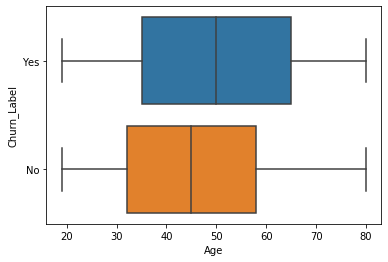

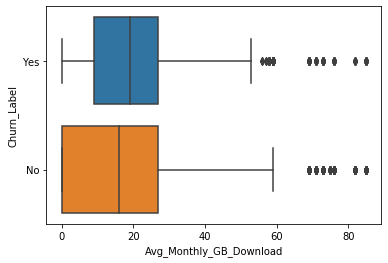

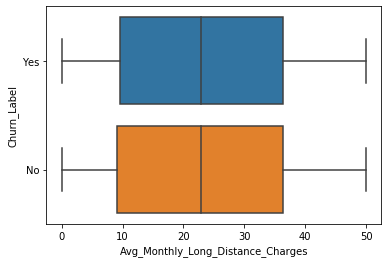

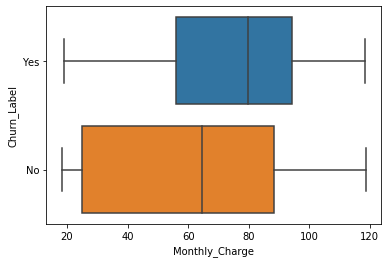

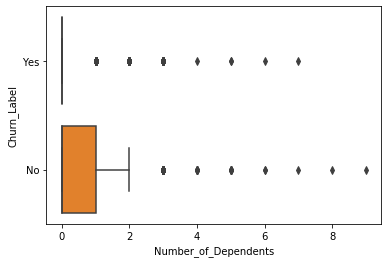

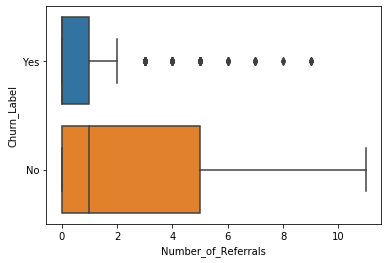

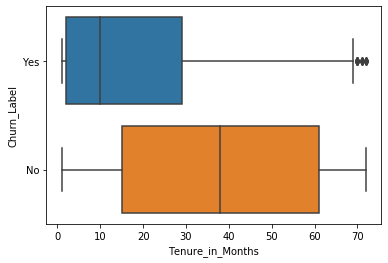

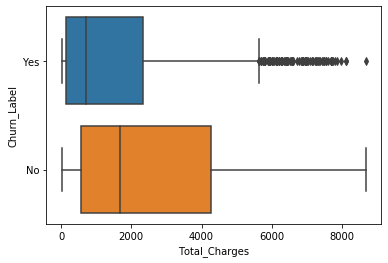

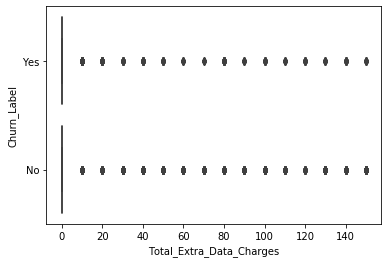

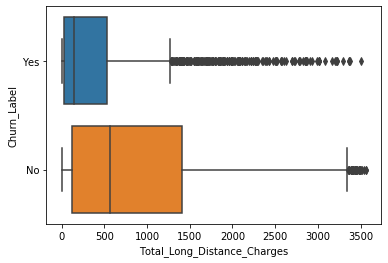

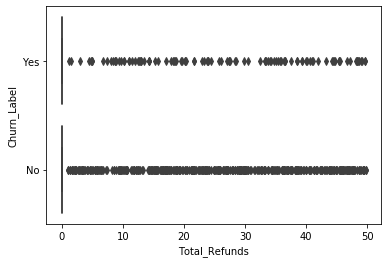

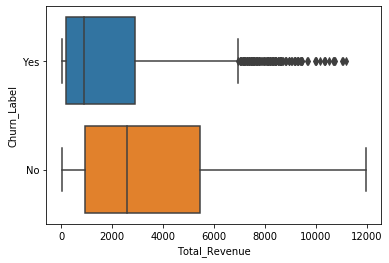

In [14]:
for col in numerical_cols:
  sns.boxplot(joined_df[col], joined_df.Churn_Label)
  plt.show()

In [15]:
# another way to look at this information is with a distplot
# write a function that takes a dataframe and the names of one
# categorical and one numerical column. 
# filter the numerical column by category and plot
# each group with a distplot so that all the distplots
# are on the same axis

def multiple_distplots(df, cat_column, num_column):
  my_title = "Distribution of " + num_column + " by " + cat_column
  for category in df[cat_column].unique():
    filtered = df[df[cat_column] == category]
    sns.distplot(filtered[num_column], label=category)
  plt.title(my_title)
  plt.legend()
  plt.show()

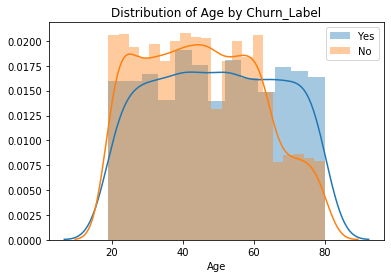

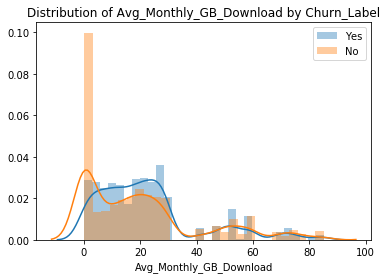

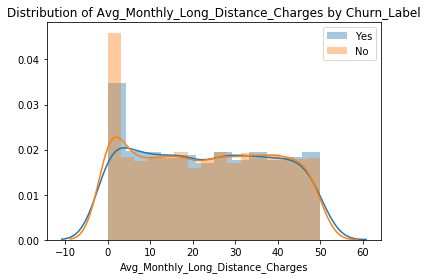

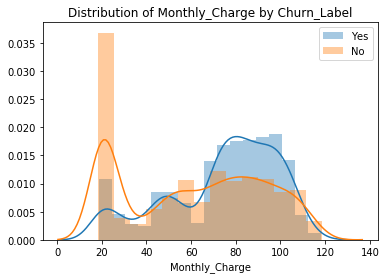

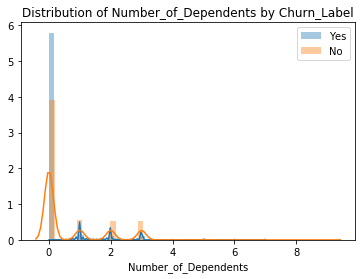

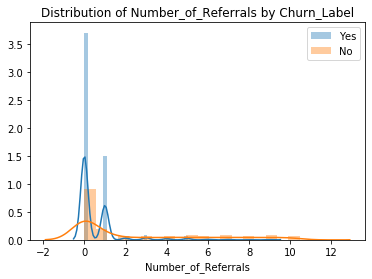

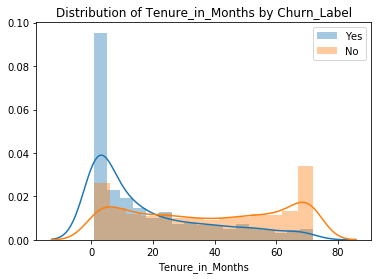

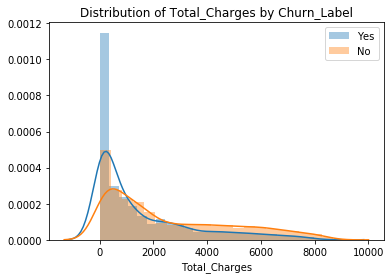

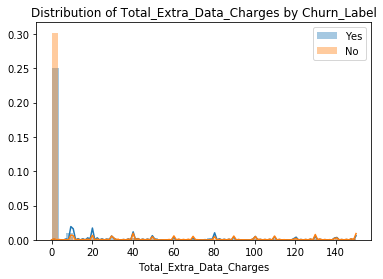

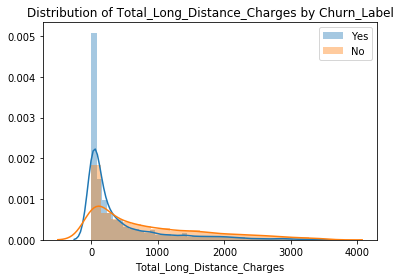

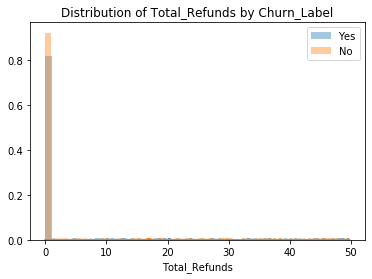

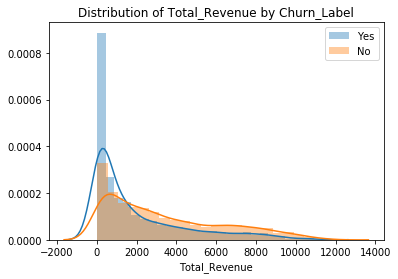

In [16]:
for col in numerical_cols:
  multiple_distplots(joined_df, "Churn_Label", col)
  

It might be nice to have them write another function that places these side by side for each individual column.

In [17]:
# make a list of all the categorical columns
categorical_cols = joined_df.columns[joined_df.dtypes == "object"]
categorical_cols

Index(['Customer_ID', 'Gender', 'Under_30', 'Senior_Citizen', 'Married',
       'Dependents', 'Referred_a_Friend', 'Offer', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Unlimited_Data',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Churn_Label'],
      dtype='object')

We obviously don't want to plot by Customer_ID, and Churn_Label is our target, so let's drop those two column names.

In [18]:
categorical_cols = categorical_cols.drop(["Customer_ID", "Churn_Label"])
categorical_cols

Index(['Gender', 'Under_30', 'Senior_Citizen', 'Married', 'Dependents',
       'Referred_a_Friend', 'Offer', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method'],
      dtype='object')

In [19]:
# write a function to create a bar chart showing Churned vs. Not Churned for 
# each value in each categorical column
def churn_bar_chart(df, feature_col, target_col):
    df.groupby(feature_col)[target_col].value_counts().unstack().plot.bar()
    plt.title(target_col + ' vs. ' + feature_col)
    plt.show()

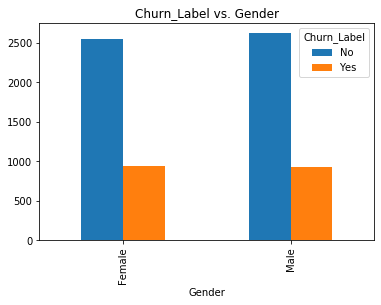

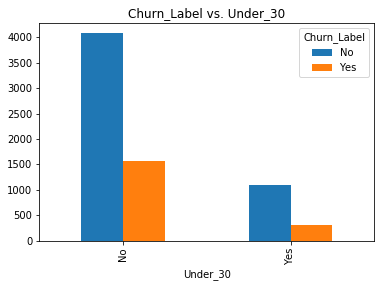

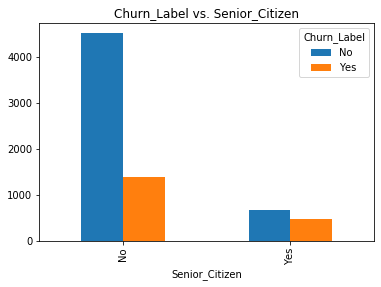

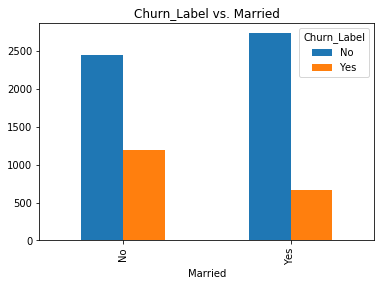

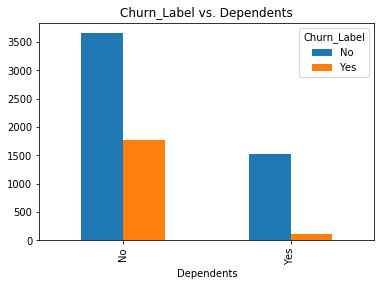

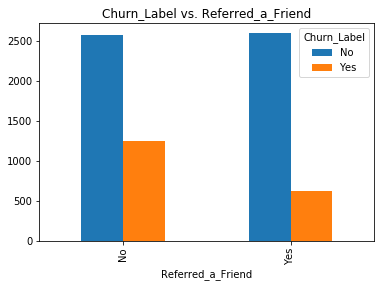

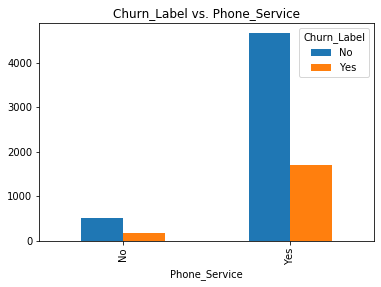

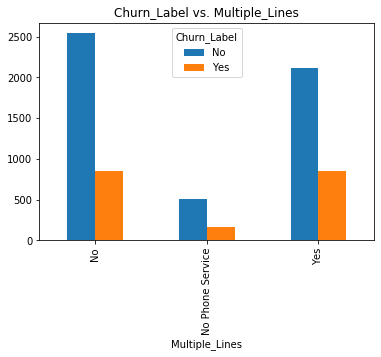

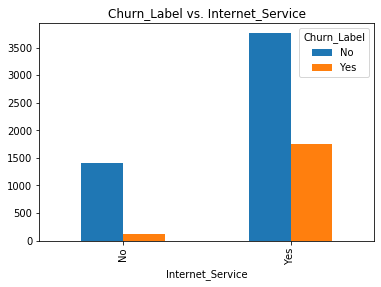

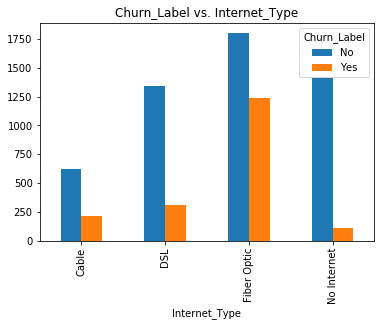

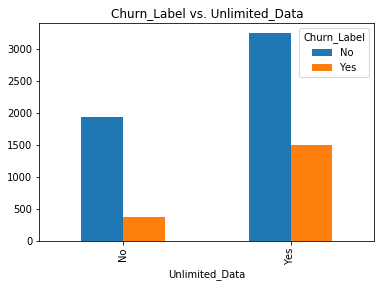

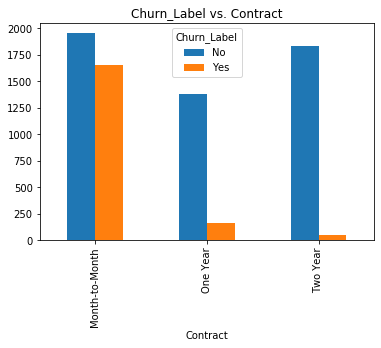

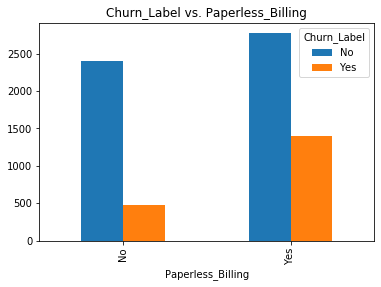

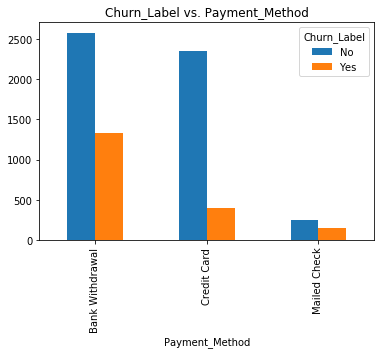

In [21]:
for col in categorical_cols:
    if len(joined_df[col].unique())<5:
        churn_bar_chart(joined_df, col, "Churn_Label")